In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
inputs = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked','Survived'])
target = df['Survived']
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [49]:
le_Pclass = LabelEncoder()
le_Sex = LabelEncoder()
le_Age = LabelEncoder()
le_Fare = LabelEncoder()

In [73]:
inputs['Pclass_n'] = le_Pclass.fit_transform(inputs['Pclass'])
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['Fare_n'] = le_Fare.fit_transform(inputs['Fare'])

In [75]:
inputs_n=inputs.drop(columns=['Pclass','Sex','Age','Fare'])

In [77]:
inputs_n

,Pclass_n,Sex_n,Age_n,Fare_n
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,88,131
889,0,1,34,153


In [79]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [81]:
model = tree.DecisionTreeClassifier()

In [83]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [85]:
model.score(inputs_n,target)

0.9797979797979798

In [87]:
sample = model.predict([[1, 0, 38, 71.3]])
sample

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

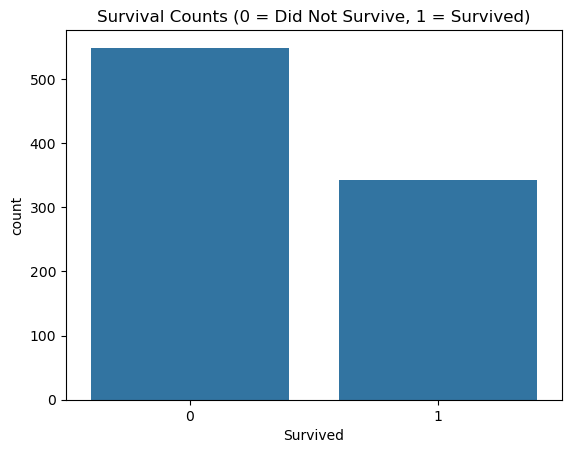

In [101]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts (0 = Did Not Survive, 1 = Survived)')
plt.show()

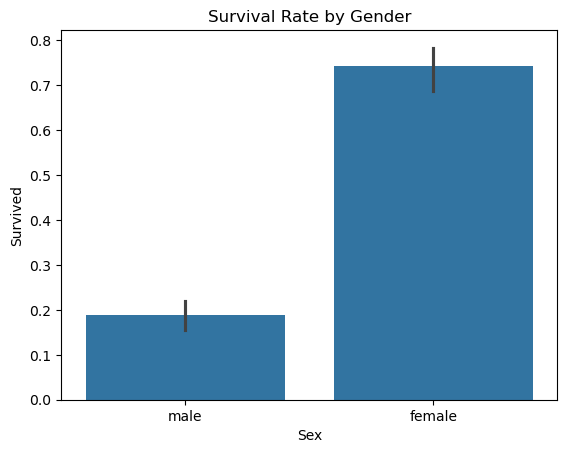

In [69]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

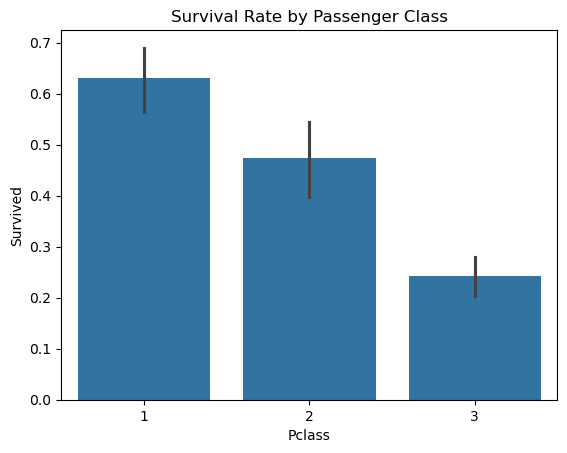

In [99]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()